# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn import impute

random.seed(42)
np.random.seed(42)

RANDOM = 42

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

Внутри многих функций есть случайность, особенно моделей, если мы хотим, чтобы модель показывала одинаковые результаты при разных запусках без изменений параметров и данных, нужно фиксировать сиды, которые определяют "случайность" (абсолютной случайности не существует, только псевдослучайность, которая задается сидами)

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [102]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [103]:
df_test.sample(n = 10, random_state=RANDOM)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
521,Tata Tigor 1.2 Revotron XT,2018,450000,35000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
737,Mahindra NuvoSport N8 AMT,2016,650000,50000,Diesel,Individual,Automatic,First Owner,17.45 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0
740,Toyota Innova 2.5 GX 7 STR,2012,520000,162000,Diesel,Individual,Manual,Fourth & Above Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),7.0
660,Hyundai Sonata 2.0L CRDi MT,2009,330000,180000,Diesel,Individual,Manual,First Owner,13.6 kmpl,1991 CC,142 bhp,"33@ 2,000-2,680(kgm@ rpm)",5.0
411,Hyundai i20 1.4 CRDi Era,2010,350000,90000,Diesel,Individual,Manual,Second Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
678,Maruti Vitara Brezza ZDi Plus,2019,900000,40000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
626,Maruti 800 AC,2006,50000,40000,Petrol,Individual,Manual,Third Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
513,Hyundai Grand i10 Magna,2016,400000,80000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
859,Maruti Wagon R VXI BS IV with ABS,2010,215000,120600,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
136,Mahindra Verito 1.5 D2 BSIV,2012,140000,120000,Diesel,Individual,Manual,Second Owner,21.03 kmpl,1461 CC,65 bhp,160Nm@ 2000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [104]:
df_test.head(5)  #первые 5

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [105]:
df_test.tail(5) #последние 5

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [106]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [107]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [108]:
#где больше 0, там есть пропуски
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [109]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [110]:
#df_train.drop('selling_price', axis=1, inplace=True)

In [111]:
df_train.duplicated(subset=df_train.columns.drop(['selling_price'])).sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [112]:
df_train[df_train.duplicated(subset=df_train.columns.drop(['selling_price']))==True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [113]:
df_train = df_train[df_train.duplicated(subset=df_train.columns.drop(['selling_price']))==False]
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [114]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [115]:
df_train = df_train.reset_index(drop = True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [116]:
df_train[['mileage', 'engine', 'max_power', 'torque']].dtypes

mileage      object
engine       object
max_power    object
torque       object
dtype: object

In [117]:
df_train['mileage'] = pd.to_numeric(df_train['mileage'].str.split().str[0])
df_train['engine'] = pd.to_numeric(df_train['engine'].str.split().str[0])
df_train['max_power'] = pd.to_numeric(df_train['max_power'].str.split().str[0], errors='coerce')

df_test['mileage'] = pd.to_numeric(df_test['mileage'].str.split().str[0])
df_test['engine'] = pd.to_numeric(df_test['engine'].str.split().str[0])
df_test['max_power'] = pd.to_numeric(df_test['max_power'].str.split().str[0],errors='coerce')


#дропнем torque
df_train = df_train.drop(['torque'], axis=1)
df_test = df_test.drop(['torque'], axis=1)


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [118]:
median_train = df_train.median(numeric_only=True)
df_train = df_train.fillna(median_train)
df_test = df_test.fillna(median_train)

In [119]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [120]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

Seats имеет фиксированный набор значений (множество дискретное)

In [121]:
df_train['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [122]:
df_train['engine'] = df_train['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')

In [123]:
df_test['engine'] = df_test['engine'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

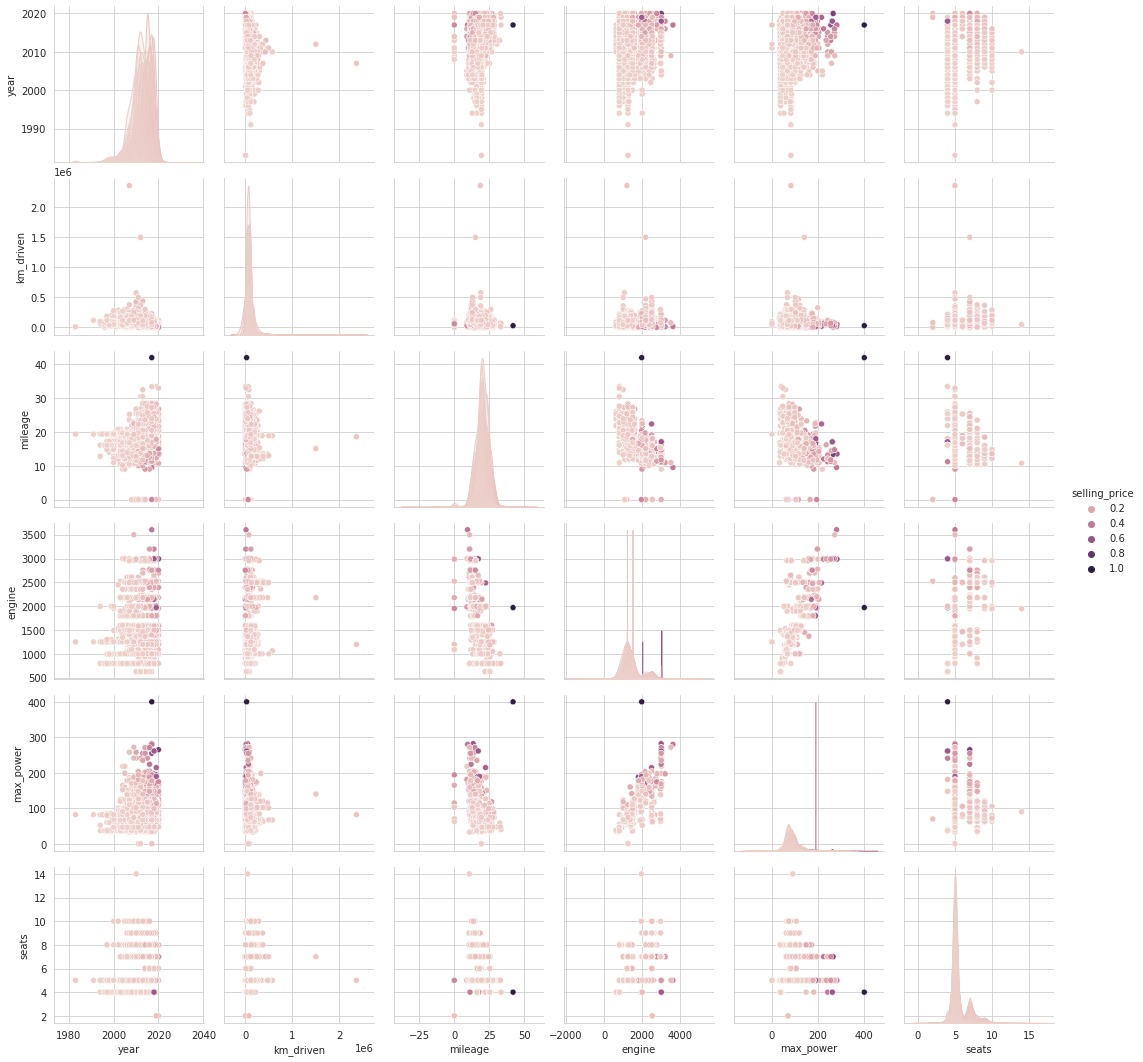

In [126]:
sns.pairplot(df_train, hue='selling_price') #построим pairplotы и на цветовой шкале выведем таргет, так нагляднее можно смотреть есть какая-то зависимость

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

1) C целевой переменной явных зависимостей не видно, однозначно разделения нет

2) Заметны более менее очевидные зависимости , например, что max_power зависит примерно линейно от engine. Это учтем позже в feature engineering

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

In [128]:
df_train.duplicated().sum()

0

In [129]:
df_test.duplicated().sum()

62

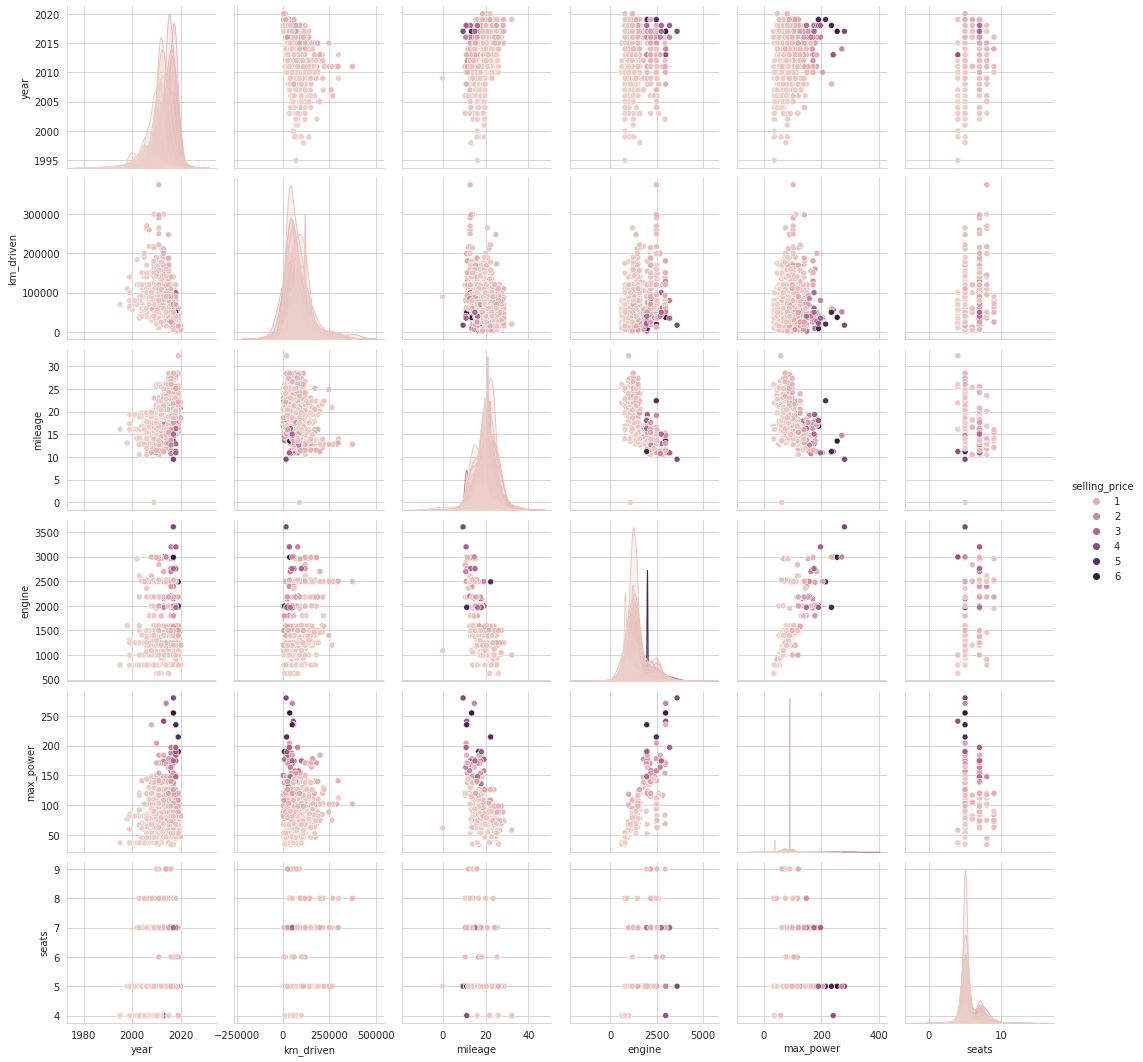

In [127]:
sns.pairplot(df_test[df_test.duplicated()==False], hue='selling_price') #здесь чтобы избежать сингулярной матрицы одинаковые строки уберем, так как иначе определитель = 0 и функция обломается

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

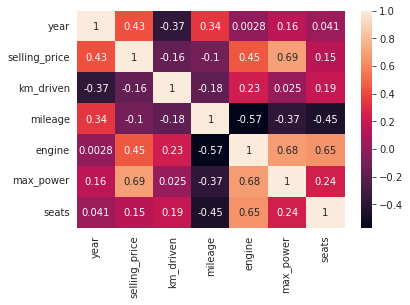

In [130]:
sns.heatmap(df_train.corr(), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
Ответ: engine и max_power, ожидаемо
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
Ответ: engine/max_power, engine/seats 
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>
Ответ: нет, не верно

(0.25 балла) <font color='#9933CC'> Отобразите диаграмму рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

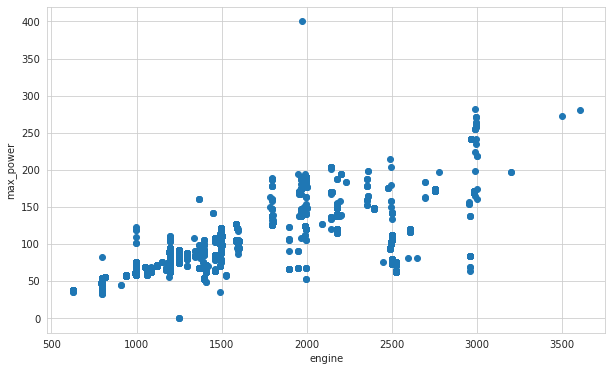

In [131]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_train['engine'], y = df_train['max_power'])
plt.xlabel("engine")
plt.ylabel("max_power")

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Надо посмотреть распределение целевой переменной, самое важное пожалуй.

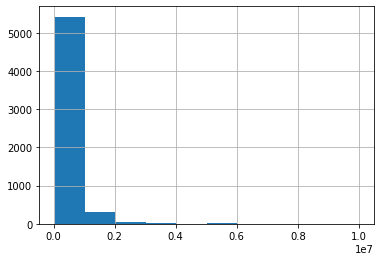

In [88]:
df_train['selling_price'].hist()

Видим что есть выбросы, но большинство распределено около 0-0.2. Может быть имеет смысл логарифмирование целевой переменной. 

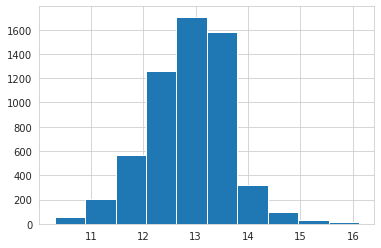

In [92]:
df_train_log = df_train
df_train_log['selling_price'] = np.log(df_train_log['selling_price'])
df_train_log['selling_price'].hist()

Вот в таком виде целевую переменную в перспективе лучше будет предсказывать линейной регрессией, ведь оно похоже на нормальное, а нормально распределенная целевая переменная лучше всего предсказывается линейной регрессией из метода максимального правдоподобия.

Мы учтем это на будущее и вспомним в графе улучшения модели (feature engineering)

Неплохим графиком также может быть зависимости по признакам, каких значений сколько в df. Например вот для seller type: 

Может быть полезно для feature engineering

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


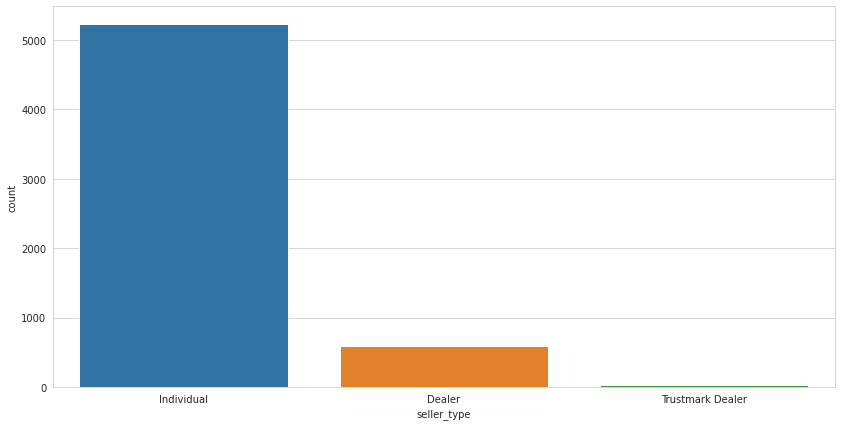

In [134]:
sns.set_style('whitegrid')
plt.figure(figsize = (14,7))
sns.countplot(df_train['seller_type'])

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [24]:
y_train = df_train['selling_price']
X_train = df_train[df_train.columns[~(df_train.dtypes == "object").values]].drop(['selling_price'], axis=1)

In [25]:
assert X_train.shape == (5840, 6)

In [26]:
y_test= df_test['selling_price']
X_test = df_test[df_test.columns[~(df_test.dtypes == "object").values]].drop(['selling_price'], axis=1)

In [27]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R2 = {r2_score(y_test, y_pred)}')
print(f'MSE = {MSE(y_test, y_pred)}')

R2 = 0.5941419794788428
MSE = 233298779730.45486


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normed = scaler.fit_transform(X_train)
normed_test = scaler.transform(X_test)
X_train_normed = pd.DataFrame(data=normed, columns = X_train.columns)
X_test_normed = pd.DataFrame(data=normed_test, columns = X_test.columns)

In [30]:
model_norm = LinearRegression()

model_norm.fit(X_train_normed, y_train)
y_pred = model_norm.predict(X_test_normed)
print(f'R2 = {r2_score(y_test, y_pred)}')
print(f'MSE = {MSE(y_test, y_pred)}')

R2 = 0.594141979478852
MSE = 233298779730.44965


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [31]:
X_train_normed.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

Feature: 0, Score: 152772.57085
Feature: 1, Score: -44158.81852
Feature: 2, Score: 28833.92578
Feature: 3, Score: 61178.49434
Feature: 4, Score: 322807.35326
Feature: 5, Score: -23209.13249


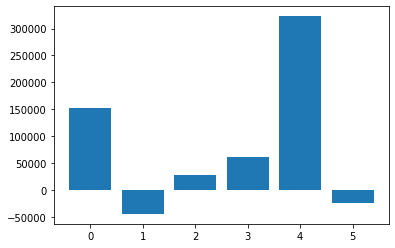

In [32]:
importance = model_norm.coef_
for i, v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

'max_power' имеет наивысший по модулю коэффициент линейной регрессии, что свидетельствует о том, что он самый важный

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_lasso = Lasso()

model_lasso.fit(X_train_normed, y_train)
y_pred_lasso = model_lasso.predict(X_test_normed)

print(f'R2 = {r2_score(y_test, y_pred_lasso)}')
print(f'MSE = {MSE(y_test, y_pred_lasso)}')

R2 = 0.5941408124026637
MSE = 233299450599.16928


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [34]:
model_lasso.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

нет, не занулила

Вероятно потому, что все наши признаки достаточно важны, не вносят шума, т.е. достаточно большие значения, L1 регуляризация зануляет близкие к 0 шумовые признаки. 

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures

lasso_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.1, 0.4, 1, 10, 100, 1000, 100000]}

pipe = Pipeline([
                 ('fit', Lasso())]
                )

model_lasso_best = GridSearchCV(pipe, param_grid=lasso_params, cv=10).fit(X_train_normed, y_train).best_estimator_

In [51]:
y_pred_lasso_best = model_lasso_best.predict(X_test_normed)

print(f'R2 = {r2_score(y_test, y_pred_lasso_best)}')
print(f'MSE = {MSE(y_test, y_pred_lasso_best)}')

R2 = 0.5929610381458169
MSE = 233977618531.21194


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

10

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [52]:
model_lasso_best.get_params()

{'memory': None,
 'steps': [('fit', Lasso(alpha=1000))],
 'verbose': False,
 'fit': Lasso(alpha=1000),
 'fit__alpha': 1000,
 'fit__copy_X': True,
 'fit__fit_intercept': True,
 'fit__max_iter': 1000,
 'fit__normalize': 'deprecated',
 'fit__positive': False,
 'fit__precompute': False,
 'fit__random_state': None,
 'fit__selection': 'cyclic',
 'fit__tol': 0.0001,
 'fit__warm_start': False}

У лучшей модели коэффициент регуляризации 1000. 

In [53]:
model_lasso.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

Нет, не занулились

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [56]:
from sklearn.linear_model import ElasticNet

ElasticNet_params = {'fit__alpha':[0.005, 0.02, 0.08, 0.1, 0.4, 1, 10, 100],
                'fit__l1_ratio': [0.06, 0.08, 0.1, 0.4, 1]}

pipe = Pipeline([
                 ('fit', ElasticNet())]
                )

model_ElasticNet_best = GridSearchCV(pipe, param_grid=ElasticNet_params, cv=10).fit(X_train_normed, y_train).best_estimator_

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [57]:
y_pred_ElasticNet_best = model_ElasticNet_best.predict(X_test_normed)

print(f'R2 = {r2_score(y_test, y_pred_ElasticNet_best)}')
print(f'MSE = {MSE(y_test, y_pred_ElasticNet_best)}')

R2 = 0.5735303752676151
MSE = 245146918408.58624


In [58]:
model_ElasticNet_best.get_params()

{'memory': None,
 'steps': [('fit', ElasticNet(alpha=0.1, l1_ratio=0.06))],
 'verbose': False,
 'fit': ElasticNet(alpha=0.1, l1_ratio=0.06),
 'fit__alpha': 0.1,
 'fit__copy_X': True,
 'fit__fit_intercept': True,
 'fit__l1_ratio': 0.06,
 'fit__max_iter': 1000,
 'fit__normalize': 'deprecated',
 'fit__positive': False,
 'fit__precompute': False,
 'fit__random_state': None,
 'fit__selection': 'cyclic',
 'fit__tol': 0.0001,
 'fit__warm_start': False}

Лучшие параметры : alpha=0.1, l1_ratio=0.06

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [59]:
X_train_cat = df_train.drop(['selling_price','name'], axis=1)

In [60]:
X_test_cat = df_test.drop(['selling_price','name'], axis=1)

In [61]:
assert X_train_cat.shape == (5840, 10)

In [62]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [65]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

enc = OneHotEncoder()

X_train_cat = X_train_cat[X_train_cat.columns[(X_train_cat.dtypes == "object").values ]]

X_test_cat = X_test_cat[X_test_cat.columns[(X_test_cat.dtypes == "object").values ]]

X_train_encoded = enc.fit_transform(X_train_cat).toarray()
X_test_encoded = enc.transform(X_test_cat).toarray()


In [67]:
X_train_enc = pd.DataFrame(data=X_train_encoded, columns = [i for i in range(14)])
X_test_enc = pd.DataFrame(data=X_test_encoded, columns = [i for i in range(14)])

Объединим с числовыми признаками:

In [68]:
whole_x_train = pd.concat([X_train_normed, X_train_enc], axis=1)
whole_x_test = pd.concat([X_test_normed, X_test_enc], axis=1)

In [69]:
X_train_encoded.shape

(5840, 14)

In [70]:
X_test_encoded.shape

(1000, 14)

In [71]:
whole_x_train.shape

(5840, 20)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Ridge_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.1, 0.4, 1, 10, 100]}

pipe = Pipeline([
                 ('fit', Ridge())]
                )

model_ridge_best = GridSearchCV(pipe, param_grid=Ridge_params, cv=10).fit(whole_x_train, y_train).best_estimator_

In [74]:
y_pred_ridge_best = model_ridge_best.predict(whole_x_test)

print(f'R2 = {r2_score(y_test, y_pred_ridge_best)}')
print(f'MSE = {MSE(y_test, y_pred_ridge_best)}')

R2 = 0.6366664971541627
MSE = 208854472655.92926


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Качество улучшилось.

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [75]:
whole_x_train

,year,km_driven,mileage,engine,max_power,seats,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,-0.434419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.139570,0.766619,0.428830,0.141162,0.493513,-0.434419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,-0.434419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.434419,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.434419,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379072,-0.707236,-0.815684,-0.434419,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5836,-0.104614,-0.398765,-0.133189,-0.888447,-0.657645,-0.434419,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5837,-0.104614,0.600136,-0.233549,-0.478663,-0.159821,-0.434419,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5838,-1.569719,0.749971,-0.660081,0.130865,0.698332,-0.434419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Мы видели по pairplot зависимость между engine и max_power, попробуем создать комбинированный признак перемножением их

In [76]:
whole_x_train['engine*max_power'] = whole_x_train['engine'] * whole_x_train['max_power']
whole_x_test['engine*max_power'] = whole_x_test['engine'] * whole_x_test['max_power']

In [ ]:
#обучим Ridge регрессию опять
Ridge_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.1, 0.4, 1, 10, 100]}

pipe = Pipeline([
                 ('fit', Ridge())]
                )

model_ridge_best_fe = GridSearchCV(pipe, param_grid=Ridge_params, cv=10).fit(whole_x_train, y_train).best_estimator_

In [79]:
y_pred_ridge_best_fe = model_ridge_best_fe.predict(whole_x_test)

print(f'R2 = {r2_score(y_test, y_pred_ridge_best_fe)}')
print(f'MSE = {MSE(y_test, y_pred_ridge_best_fe)}')

R2 = 0.6649684653609942
MSE = 192585693149.87112


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Качество улучшилось, теперь попробуем связать год продажи и пробег, перемножив и их. 

In [80]:
whole_x_train['year*mileage'] = whole_x_train['year'] * whole_x_train['mileage']
whole_x_test['year*mileage'] = whole_x_test['year'] * whole_x_test['mileage']

In [ ]:
#обучим Ridge регрессию опять
Ridge_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.1, 0.4, 1, 10, 100]}

pipe = Pipeline([
                 ('fit', Ridge())]
                )

model_ridge_best_fe = GridSearchCV(pipe, param_grid=Ridge_params, cv=10).fit(whole_x_train, y_train).best_estimator_

In [82]:
y_pred_ridge_best_fe = model_ridge_best_fe.predict(whole_x_test)

print(f'R2 = {r2_score(y_test, y_pred_ridge_best_fe)}')
print(f'MSE = {MSE(y_test, y_pred_ridge_best_fe)}')

R2 = 0.6686960650162559
MSE = 190442962424.0387


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Качество еще немного улучшилось, но не особо значительно

Попробуем логарифмировать целевую переменную, чтобы она стала распределена близко к нормальному.

In [93]:
y_train = np.log(y_train)
y_test = np.log(y_test)

Еще раз покажу, почему стало лучше:

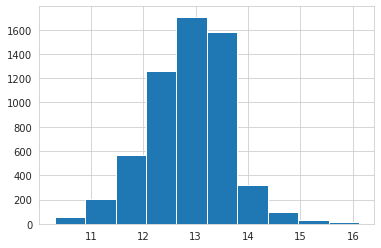

In [96]:
y_train.hist()

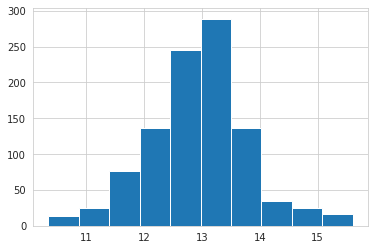

In [97]:
y_test.hist()

In [ ]:
#обучим Ridge регрессию опять
Ridge_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.1, 0.4, 1, 10, 100]}

pipe = Pipeline([
                 ('fit', Ridge())]
                )

model_ridge_best_fe = GridSearchCV(pipe, param_grid=Ridge_params, cv=10).fit(whole_x_train, y_train).best_estimator_

In [137]:
y_pred_ridge_best_fe = model_ridge_best_fe.predict(whole_x_test)

print(f'R2 = {r2_score(y_test, y_pred_ridge_best_fe)}')
print(f'MSE = {MSE(y_test, y_pred_ridge_best_fe)}')

R2 = 0.8721974502042741
MSE = 0.09141807885143158


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Вот так сразу видим серьезное улучшение! Ведь распределение целевой переменной крайне важно для линейной регрессии! 

In [139]:
#сохраним веса лучшей модели в pickle
import pickle
pickle.dump(model_ridge_best_fe, open('model_best_weights', 'wb'))

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [136]:
def business_metrics(y_true, y_pred):
    perc = pd.DataFrame({'percentage': abs(y_pred-y_true)/y_true})
    perc_10_len = len(perc[perc['percentage']<=0.1])
    return perc_10_len / len(perc)
    # your code here

print(f'Значение бизнес-метрики: {business_metrics(np.exp(y_test), np.exp(y_pred_ridge_best_fe))}')

Значение бизнес-метрики: 0.293


# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [86]:
!pip install FastAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 7.9 MB/s 


In [87]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link